# **Supply Chain for big data analysis**

## 1 Introduction


### 1.1 Dataset Overview


- A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain, which allows the use of Machine Learning Algorithms and Python.

- Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution. It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.

### 1.2 Data Dictionary

- Data Dimension: 180,520 rows, 53 columns

- **`Type`**	:  Type of transaction made


+ **`Days for shipping (real)`**     	:  Actual shipping days of the purchased product


- **`Days for shipment (scheduled)`**	:  Days of scheduled delivery of the purchased product


- **`Benefit per order`**	:  Earnings per order placed


+ **`Type`** : Type of transaction made

+ **`Days for shipping (real)`** : Actual shipping days of the purchased product

+ **`Days for shipment (scheduled)`** : Days of scheduled delivery of the purchased product

+ **`Benefit per order`** : Earnings per order placed

+ **`Sales per customer`** : Total sales per customer made per customer

+ **`Delivery Status`** : Delivery status of orders: Advance shipping, Late delivery, Shipping canceled, Shipping on time

+ **`Late_delivery_risk`** : Categorical variable that indicates if sending is late (1), it is not late (0).

+ **`Category Id`** : Product category code

+ **`Category Name`** : Description of the product category

+ **`Customer City`** : City where the customer made the purchase

+ **`Customer Country`** : Country where the customer made the purchase

+ **`Customer Email`** : Customer's email

+ **`Customer Fname`** : Customer name

+ **`Customer Id`** : Customer ID

+ **`Customer Lname`** : Customer lastname

+ **`Customer Password`** : Masked customer key

+ **`Customer Segment`** : Types of Customers: Consumer, Corporate, Home Office

+ **`Customer State`** : State to which the store where the purchase is registered belongs

+ **`Customer Street`** : Street to which the store where the purchase is registered belongs

+ **`Customer Zipcode`** : Customer Zipcode

+ **`Department Id`** : Department code of store

+ **`Department Name`** : Department name of store

+ **`Latitude`** : Latitude corresponding to location of store

+ **`Longitude`** : Longitude corresponding to location of store

+ **`Market`** : Market to where the order is delivered: Africa, Europe, LATAM, Pacific Asia, USCA

+ **`Order City`** : Destination city of the order

+ **`Order Country`** : Destination country of the order

+ **`Order Customer Id`** : Customer order code

+ **`order date (DateOrders)`** : Date on which the order is made

+ **`Order Id`** : Order code

+ **`Order Item Cardprod Id`** : Product code generated through the RFID reader

+ **`Order Item Discount`** : Order item discount value

+ **`Order Item Discount Rate`** : Order item discount percentage

+ **`Order Item Id`** : Order item code

+ **`Order Item Product Price`** : Price of products without discount

+ **`Order Item Profit Ratio`** : Order Item Profit Ratio

+ **`Order Item Quantity`** : Number of products per order

+ **`Sales`** : Value in sales

+ **`Order Item Total`** : Total amount per order

+ **`Order Profit Per Order`** : Order Profit Per Order

+ **`Order Region`** : Region of the world where the order is delivered: Southeast Asia, South Asia, Oceania, Eastern Asia, West Asia, West of USA, US Center, West Africa, Central Africa, North Africa, Western Europe, Northern, Caribbean, South America, East Africa, Southern Europe, East of USA, Canada, Southern Africa, Central Asia, Europe, Central America, Eastern Europe, South of USA

+ **`Order State`** : State of the region where the order is delivered

+ **`Order Status`** : COMPLETE, PENDING, CLOSED, PENDING_PAYMENT, CANCELED, PROCESSING, SUSPECTED_FRAUD, ON_HOLD, PAYMENT_REVIEW

+ **`Product Card Id`** : Product code

+ **`Product Category Id`** : Product category code

+ **`Product Description`** : Product Description

+ **`Product Image`** : Link of visit and purchase of the product

+ **`Product Name`** : Product Name

+ **`Product Price`** : Product Price

+ **`Product Status`** : Status of the product stock: If it is 1 not available, 0 the product is available

+ **`Shipping date (DateOrders)`** : Exact date and time of shipment

+ **`Shipping Mode`** : The following shipping modes are presented: Standard Class, First Class, Second Class, Same Day


## 2 Objective

Forecasting the duration of shipments and assessing the likelihood of delayed deliveries

- Developing Machine learning models to ascertain the potential shipping time range by forecasting both the quickest and typical delivery durations for shipments, encompassing both domestic and international customers.


- Constructing a Binary Classifier to identify orders with a significant likelihood of experiencing delays (Late Delivery Risk Analyzer).

## 3 Exploratory Data Analysis (EDA) and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Project/DataCoSupplyChainDataset.csv'
data = pd.read_csv(path, encoding='cp1252')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
for i in range(0, len(data.columns), 10):
    columns_subset = data.columns[i:i+10]
    print(columns_subset)
    data[columns_subset].info()
    print("\n--- Next 10 columns ---\n")

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name               

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
print(numeric_columns.columns)
print('*Count of Numerical columns:', sum(data.dtypes == 'int64') + sum(data.dtypes == 'float64'))

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')
*Count of Numerical columns: 29


In [ ]:
categorical_columns = data.select_dtypes(include=['object'])
print(categorical_columns.columns)
print('*Count of Categorical columns:', sum(data.dtypes == 'object'))

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')
*Count of Categorical columns: 24


In [ ]:
data['Shipping_Days_Difference'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

In [ ]:
df_continous = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Shipping_Days_Difference', 'Benefit per order', 'Sales per customer', 'Order Item Quantity']

In [ ]:
data[df_continous].describe()

,Days for shipping (real),Days for shipment (scheduled),Shipping_Days_Difference,Benefit per order,Sales per customer,Order Item Quantity
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,0.565807,21.974989,183.107609,2.127638
std,1.623722,1.374449,1.490966,104.433526,120.043670,1.453451
min,0.000000,0.000000,-2.000000,-4274.979980,7.490000,1.000000
25%,2.000000,2.000000,0.000000,7.000000,104.379997,1.000000
50%,3.000000,4.000000,1.000000,31.520000,163.990005,1.000000
75%,5.000000,4.000000,1.000000,64.800003,247.399994,3.000000
max,6.000000,4.000000,4.000000,911.799988,1939.989990,5.000000


In [ ]:
data.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


> There's no meaningful missing values in this dataset. When it comes to the zipcode (`Order Zipcode`) and product description(`Product Description`), other information such as county, state, product name and category name information will be used instead in the future analysis.

In [ ]:
#Remove private information and not neccesary data which have a lot of null data
columns_to_remove = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Product Description', 'Order Zipcode']
df_cleaned = data.drop(columns_to_remove, axis=1)

df_cleaned.to_csv('/content/drive/MyDrive/Project/CleanedDataCoSupplyChainDataset.csv', index=False)

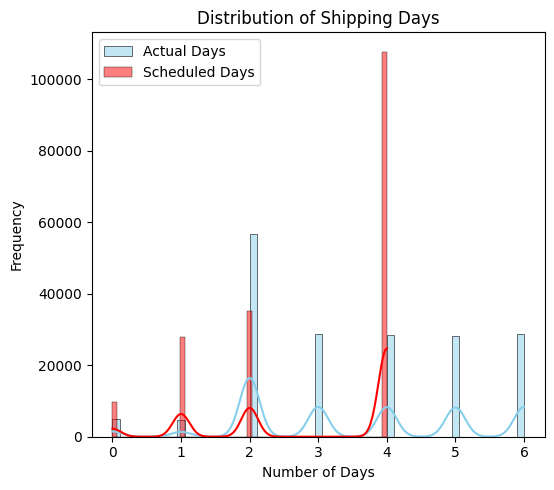

In [ ]:
# Distribution of actual and scheduled shipping days
days_actual = data['Days for shipping (real)']
days_scheduled = data['Days for shipment (scheduled)']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(days_actual, color="skyblue", label='Actual Days', kde=True)
sns.histplot(days_scheduled, color="red", label='Scheduled Days', kde=True)
plt.title('Distribution of Shipping Days')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

> The actual range of shipping days is between 2 to 6 days, with most being scheduled within a four-day timeframe.


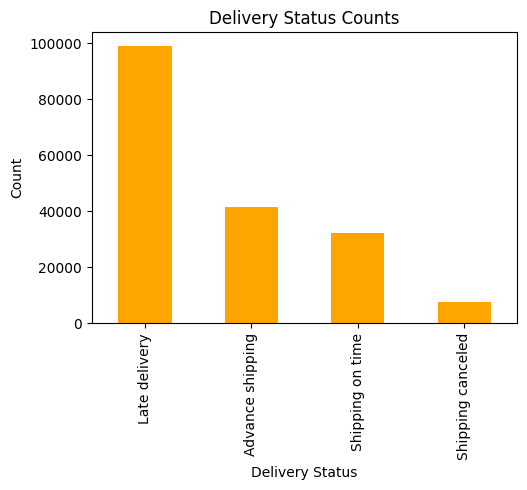

In [ ]:
# Analysis of 'Delivery Status'
delivery_status_counts = data['Delivery Status'].value_counts()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
delivery_status_counts.plot(kind='bar', color='orange')
plt.title('Delivery Status Counts')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

> Late deliveries have occurred most frequently, followed closely by instances of advanced shipping.

In [ ]:
late_delivery_risk = pd.DataFrame(data['Late_delivery_risk'])
late_delivery_risk['Late_delivery_risk'] = late_delivery_risk['Late_delivery_risk'].map({0: 'Not at risk', 1: 'Late delivery risk'})

<ipython-input-16-2806a4e3c67a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=late_delivery_risk.squeeze(), y=days_actual, palette="Set2")


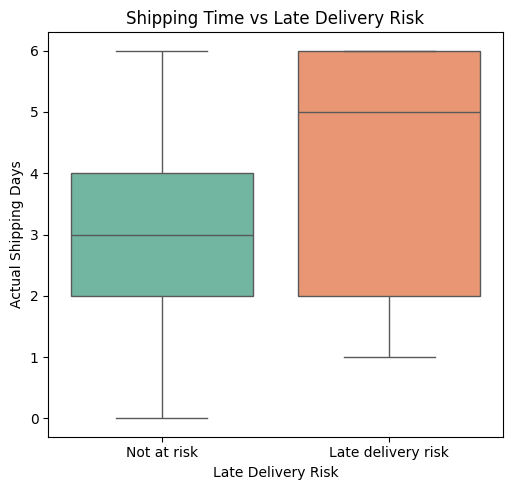

In [ ]:
# Correlation between shipping time and late delivery risk
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
sns.boxplot(x=late_delivery_risk.squeeze(), y=days_actual, palette="Set2")
plt.title('Shipping Time vs Late Delivery Risk')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Actual Shipping Days')

plt.tight_layout()
plt.show()

>  The boxplot indicates that shipments classified as having a late delivery risk (1) generally take longer, showing a higher median and a wider range of actual shipping days, compared to those not at risk (0). Furthermore, the increased spread and higher values for at-risk shipments suggest that the late delivery risk is well-correlated with actual shipping time.

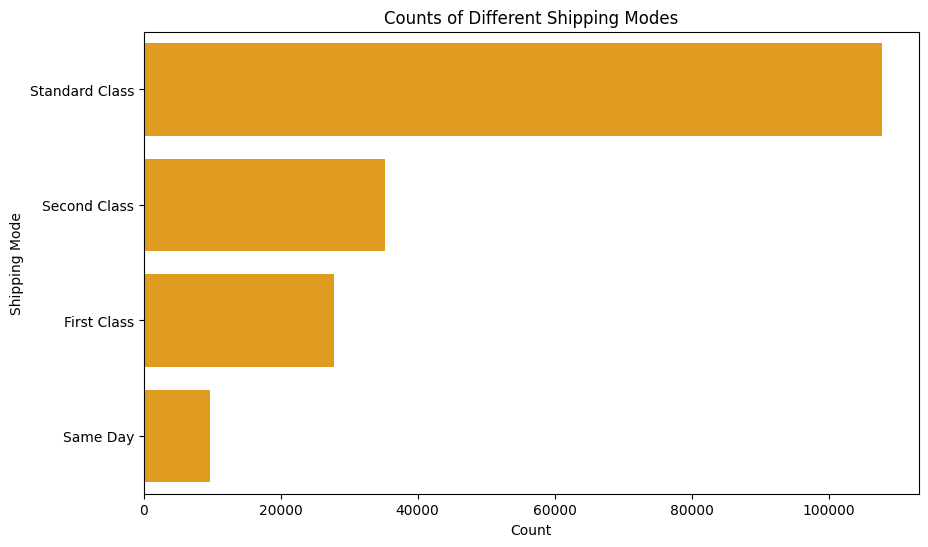

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Shipping Mode', data=data, order = data['Shipping Mode'].value_counts().index, color='orange')
plt.title('Counts of Different Shipping Modes')
plt.xlabel('Count')
plt.ylabel('Shipping Mode')
plt.show()

> Stabdard class has been used commonly in various shipping modes.

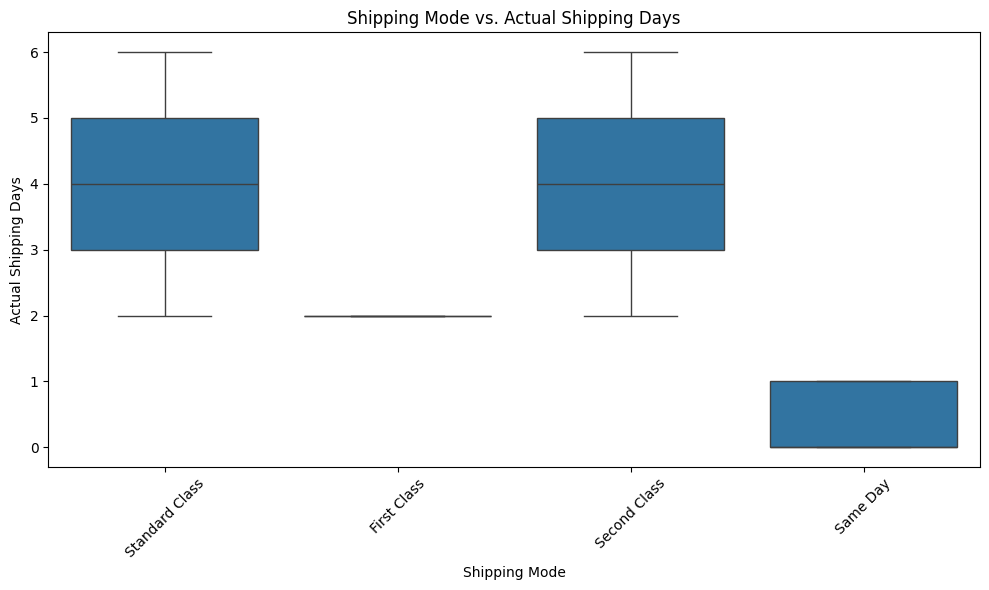

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Mode', y='Days for shipping (real)', data=data)
plt.title('Shipping Mode vs. Actual Shipping Days')
plt.ylabel('Actual Shipping Days')
plt.xlabel('Shipping Mode')
plt.xticks(rotation=45)
plt.tight_layout()

> Same Day shipping is significantly faster than First, Standard and Second Class shipping options, with the latter two (Standard and Second Class) showing more variability in actual shipping days. First Class appears to have a slightly smaller range of days than Standard and Second Class, indicating more consistent delivery times.

In [ ]:
df_cleaned.loc[df_cleaned['Product Category Id'] == 34]['Category Name'].unique()

array(['Golf Bags & Carts'], dtype=object)

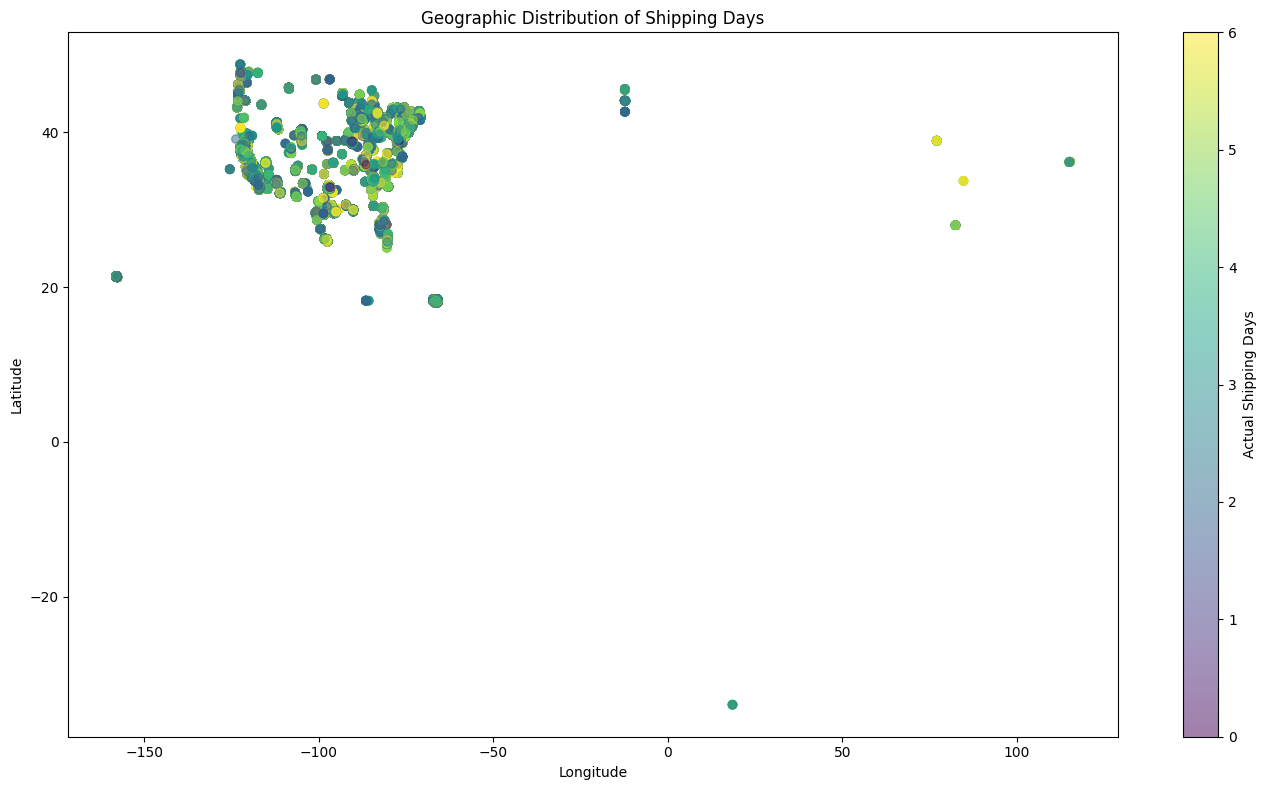

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Days for shipping (real)'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Shipping Days')
plt.title('Geographic Distribution of Shipping Days')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.tight_layout()

plt.show()

In [ ]:
#identifying outliers

Q1 = df_cleaned[['Latitude', 'Longitude']].quantile(0.25)
Q3 = df_cleaned[['Latitude', 'Longitude']].quantile(0.75)
IQR = Q3 - Q1
threshold_iqr = 1.5
outliers_iqr = np.where((df_cleaned[['Latitude', 'Longitude']] < (Q1 - threshold_iqr * IQR)) |
                        (df_cleaned[['Latitude', 'Longitude']] > (Q3 + threshold_iqr * IQR)))

In [ ]:
# remove outliers

df_cleaned = df_cleaned.drop(outliers_iqr[0]).reset_index(drop=True)

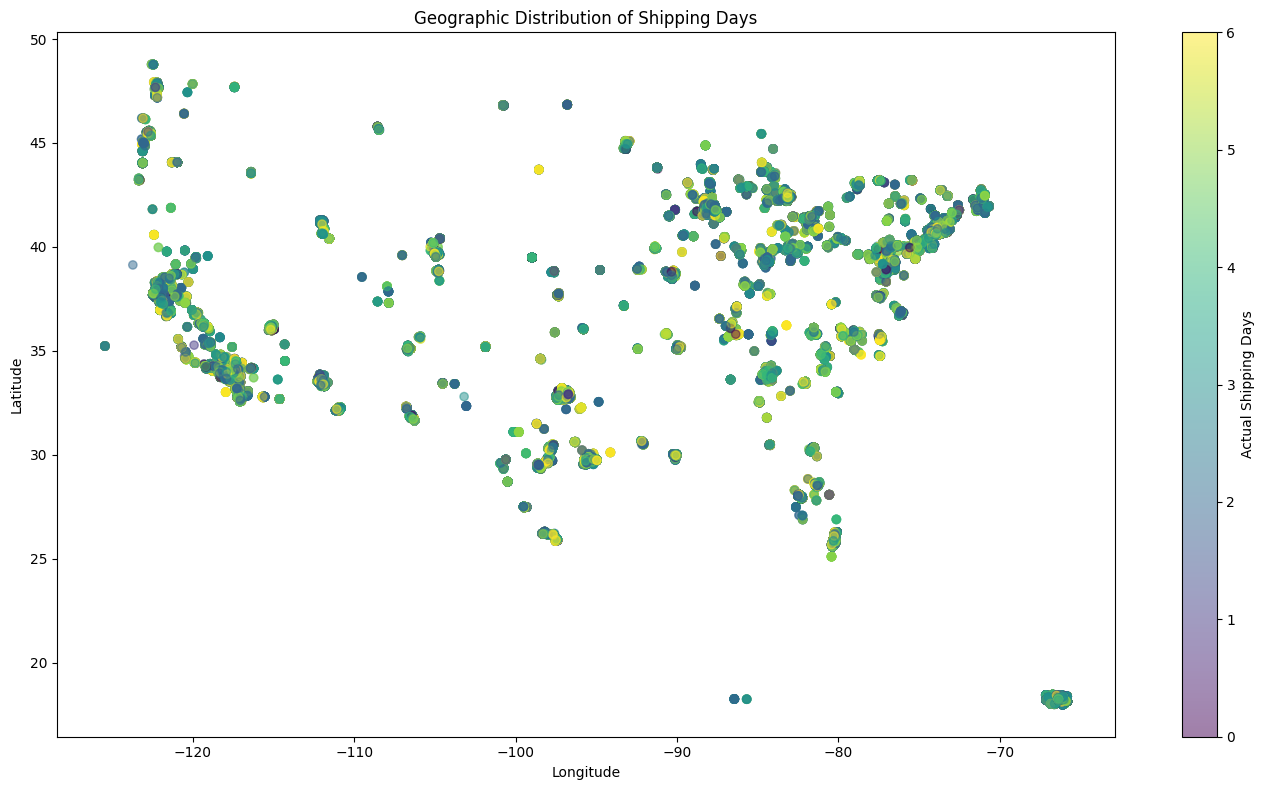

In [ ]:
# drawing plot again without outliers

plt.figure(figsize=(14, 8))
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], c=df_cleaned['Days for shipping (real)'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Shipping Days')
plt.title('Geographic Distribution of Shipping Days')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.tight_layout()

plt.show()


> There's no meaningful association between Longitude, Latitude and Actual Shipping days

In [ ]:
df_cleaned.groupby(['Market']).size()

,0
Market,
Africa,11523
Europe,49865
LATAM,51199
Pacific Asia,40893
USCA,25625


<Axes: xlabel='Market'>

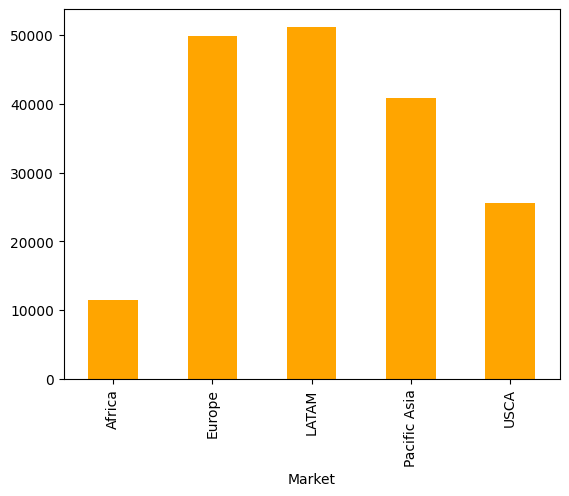

In [ ]:
df_cleaned.groupby(['Market']).size().plot(kind='bar', color='orange')

<ipython-input-26-5c51586b67c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Market', y='Days for shipping (real)', data=data, palette="Set2")


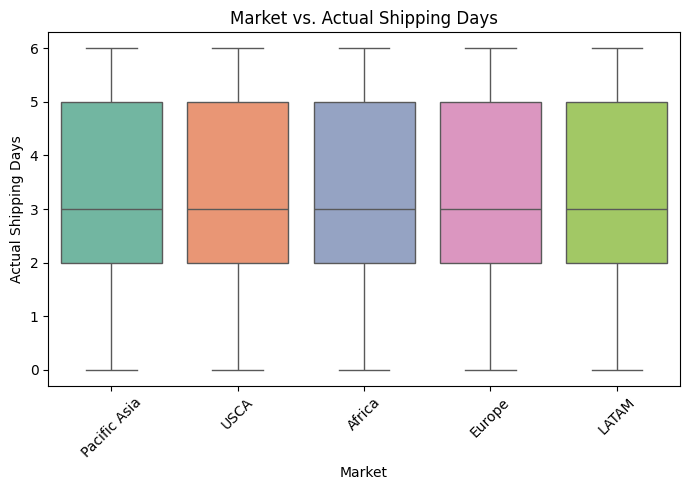

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Market', y='Days for shipping (real)', data=data, palette="Set2")
plt.title('Market vs. Actual Shipping Days')
plt.ylabel('Actual Shipping Days')
plt.xlabel('Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> There's no association between Market and Actual Shipping Days.

In [ ]:
df_cleaned.groupby(['Order Region']).size()

,0
Order Region,
Canada,953
Caribbean,8271
Central Africa,1656
Central America,28089
Central Asia,547
East Africa,1849
East of USA,6879
Eastern Asia,7223
Eastern Europe,3879


<ipython-input-28-d6822d833ec8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Region', y='Days for shipping (real)', data=data, palette="Set2")


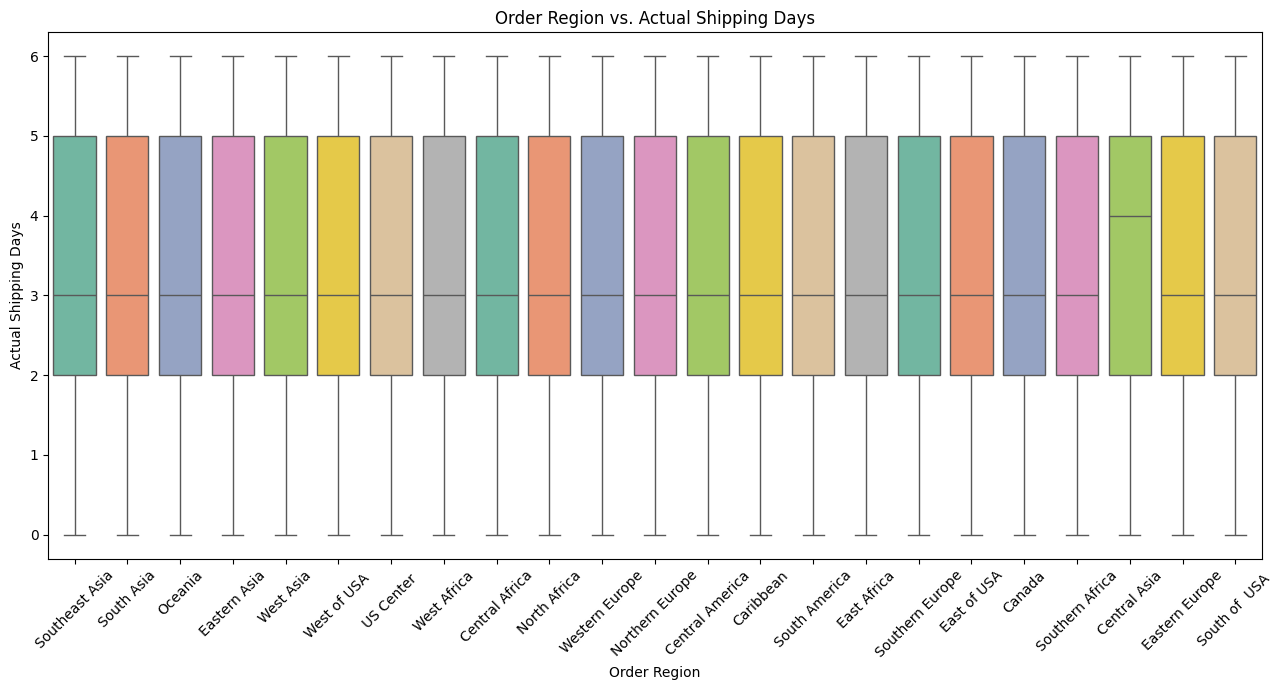

In [ ]:
plt.figure(figsize=(13, 7))
sns.boxplot(x='Order Region', y='Days for shipping (real)', data=data, palette="Set2")
plt.title('Order Region vs. Actual Shipping Days')
plt.ylabel('Actual Shipping Days')
plt.xlabel('Order Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> There are nothing special association between order region and actual shipping days, but median of actual shipping days in Central Asia is one day latter than other regions.

<Axes: xlabel='Order Region'>

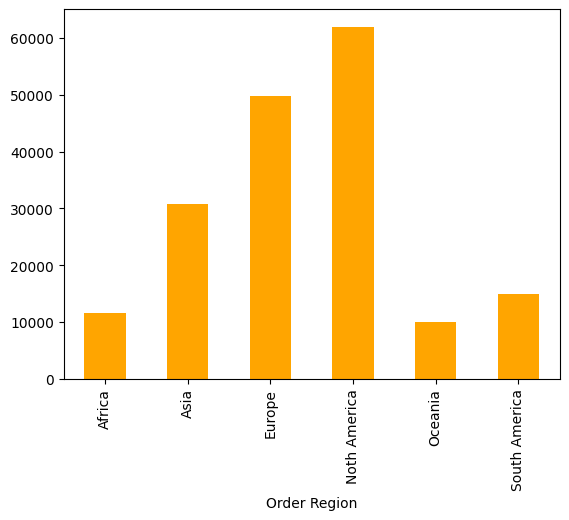

In [ ]:
#Merge data into 6 continents groups
 # Asia(Southeast Asia, South Asia, Eastern Asia, West Asia, Central Asia)
 # Oceania
 # North America (West of USA, US Center, East of USA, Canada, South of USA, Central America), (Caribbean)
 # South America
 # Africa (West Africa, Central Africa, North Africa, East Africa, Southern Africa)
 # Europe (Western Europe, Northern Europe, Southern Europe, Eastern Europe)

df_cleaned.loc[df_cleaned['Order Region'].isin(['West of USA ', 'US Center ', 'East of USA', 'Canada', 'South of  USA ', 'Central America', 'Caribbean']), 'Order Region'] = 'Noth America'
df_cleaned.loc[df_cleaned['Order Region'].isin(['Southeast Asia', 'South Asia', 'Eastern Asia', 'West Asia', 'Central Asia']), 'Order Region'] = 'Asia'
df_cleaned.loc[df_cleaned['Order Region'].isin(['West Africa', 'Central Africa', 'North Africa', 'East Africa', 'Southern Africa']), 'Order Region'] = 'Africa'
df_cleaned.loc[df_cleaned['Order Region'].isin(['Western Europe', 'Northern Europe', 'Southern Europe', 'Eastern Europe']), 'Order Region'] = 'Europe'
df_cleaned.groupby(['Order Region']).size()

df_cleaned.groupby(['Order Region']).size().plot(kind='bar', color='orange')

<ipython-input-30-4e6514ec6f83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Region', y='Days for shipping (real)', data=df_cleaned, palette="Set2")


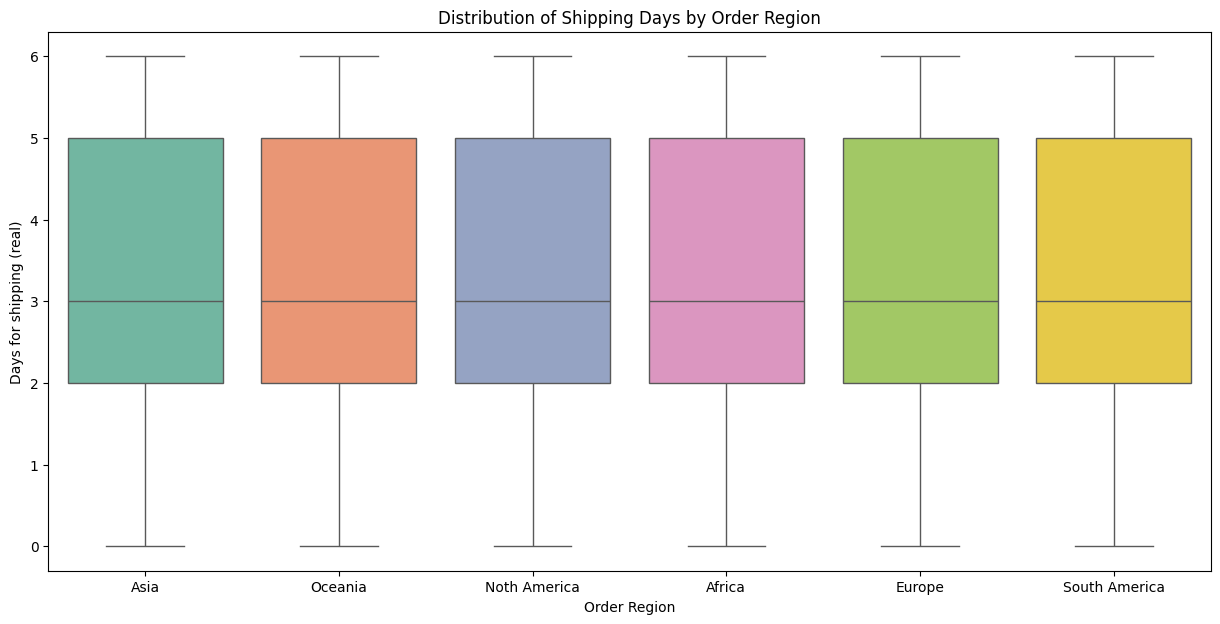

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='Order Region', y='Days for shipping (real)', data=df_cleaned, palette="Set2")

plt.title('Distribution of Shipping Days by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Days for shipping (real)')

plt.show()

> > There are no meaningful associations between Order Region and Actual shipping days

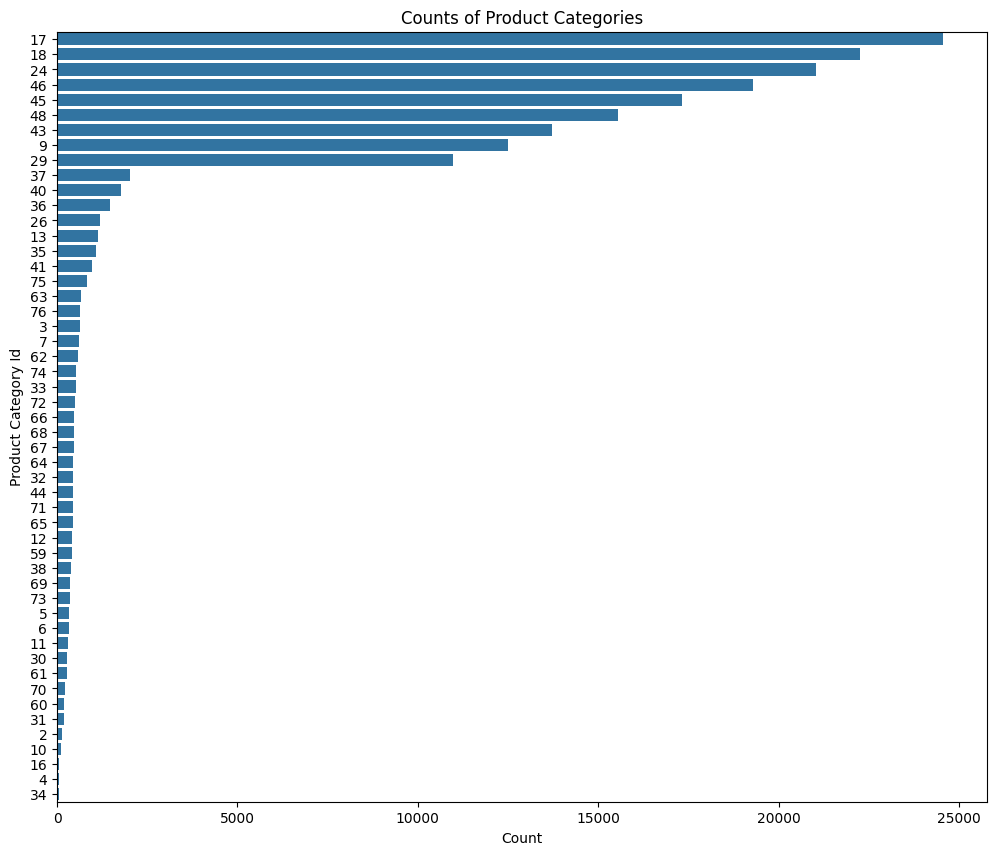

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Product Category Id', data=data, order = data['Product Category Id'].value_counts().index)
plt.title('Counts of Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category Id')
plt.show()

<ipython-input-32-1b353a3c8ba4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category Id', y='Days for shipping (real)', data=data, palette="Set2")


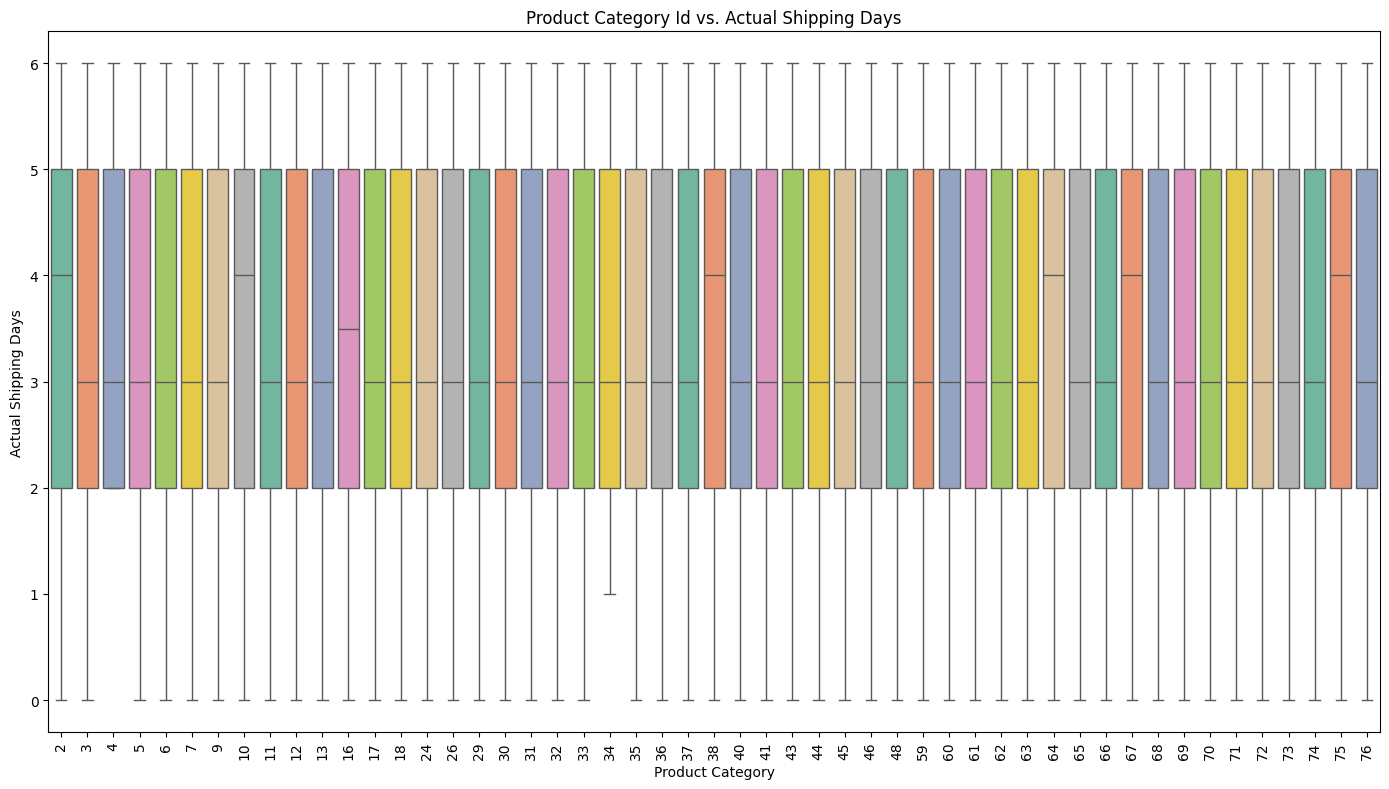

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product Category Id', y='Days for shipping (real)', data=data, palette="Set2")
plt.title('Product Category Id vs. Actual Shipping Days')
plt.ylabel('Actual Shipping Days')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.tight_layout()

plt.tight_layout()
plt.show()

> According to the previous figures, there is no significant association between the actual shipping days and the product category.

In [ ]:
df_cleaned.groupby(['Department Name']).size()

,0
Department Name,
Apparel,48627
Book Shop,404
Discs Shop,2011
Fan Shop,66334
Fitness,2456
Footwear,14419
Golf,32944
Health and Beauty,359
Outdoors,9609


In [ ]:
#Checking Department name with Category Name
print("1) Apparel :", df_cleaned.loc[df_cleaned['Department Name'] == 'Apparel']['Category Name'].unique())
print("2) Book Shop :", df_cleaned.loc[df_cleaned['Department Name'] == 'Book Shop']['Category Name'].unique())
print("3) Discs Shop :", df_cleaned.loc[df_cleaned['Department Name'] == 'Discs Shop']['Category Name'].unique())
print("4) Fan Shop :",df_cleaned.loc[df_cleaned['Department Name'] == 'Fan Shop']['Category Name'].unique())
print("5) Fitness :",df_cleaned.loc[df_cleaned['Department Name'] == 'Fitness']['Category Name'].unique())
print("6) Footwear :", df_cleaned.loc[df_cleaned['Department Name'] == 'Footwear']['Category Name'].unique())
print("7) Golf :", df_cleaned.loc[df_cleaned['Department Name'] == 'Golf']['Category Name'].unique())
print("8) Health and Beauty :", df_cleaned.loc[df_cleaned['Department Name'] == 'Health and Beauty']['Category Name'].unique())
print("9) Outdoors :",df_cleaned.loc[df_cleaned['Department Name'] == 'Outdoors']['Category Name'].unique())
print("10) Pet Shop :", df_cleaned.loc[df_cleaned['Department Name'] == 'Pet Shop']['Category Name'].unique())
print("11) Technology :",df_cleaned.loc[df_cleaned['Department Name'] == 'Technology']['Category Name'].unique())

1) Apparel : ['Cleats' "Men's Footwear" "Women's Clothing" 'Crafts' "Men's Clothing"
 "Children's Clothing" 'Baby ']
2) Book Shop : ['Books ']
3) Discs Shop : ['DVDs' 'CDs ' 'Music' 'Video Games']
4) Fan Shop : ['Hunting & Shooting' 'Camping & Hiking' 'Fishing' 'Toys' 'Water Sports'
 'Indoor/Outdoor Games']
5) Fitness : ['Sporting Goods' 'Baseball & Softball' 'Basketball' 'Soccer'
 'Tennis & Racquet' 'Lacrosse' 'Hockey']
6) Footwear : ['Electronics' 'Boxing & MMA' 'Cardio Equipment' 'Fitness Accessories'
 'As Seen on  TV!' 'Strength Training']
7) Golf : ['Shop By Sport' "Women's Apparel" "Girls' Apparel"]
8) Health and Beauty : []
9) Outdoors : ['Trade-In' 'Electronics' "Kids' Golf Clubs" 'Accessories' 'Golf Balls'
 'Garden' 'Golf Gloves' 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel'
 "Women's Golf Clubs" "Men's Golf Clubs"]
10) Pet Shop : ['Pet Supplies']
11) Technology : ['Consumer Electronics' 'Cameras ' 'Computers']


In [ ]:
df_cleaned.loc[df_cleaned['Department Name'] == 'Fan Shop']['Category Name'].unique()

array(['Hunting & Shooting', 'Camping & Hiking', 'Fishing', 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

<Axes: xlabel='Department Name'>

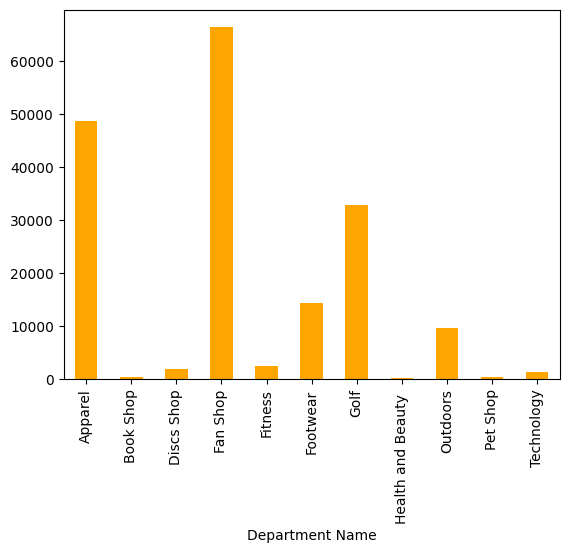

In [ ]:
df_cleaned.groupby(['Department Name']).size().plot(kind='bar', color='orange')

<Axes: xlabel='Department Name'>

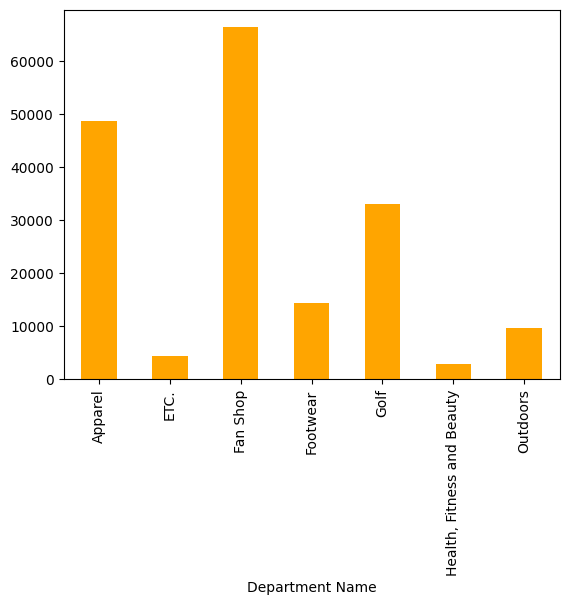

In [ ]:
#merging
#ETC: Book Shop + Discs Shop + Pet Shop + Technology
#Fitness, Health and Beauty: Health and Beauty + Fitness

df_cleaned.loc[df_cleaned['Department Name'].isin(['Book Shop', 'Discs Shop', 'Pet Shop', 'Technology']), 'Department Name'] = 'ETC.'
df_cleaned.loc[df_cleaned['Department Name'].isin(['Fitness', 'Health and Beauty ']), 'Department Name'] = 'Health, Fitness and Beauty'

df_cleaned.groupby(['Department Name']).size()

df_cleaned.groupby(['Department Name']).size().plot(kind='bar', color='orange')

<ipython-input-38-515bdd3abb1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department Name', y='Days for shipping (real)', data=df_cleaned, palette="Set2")


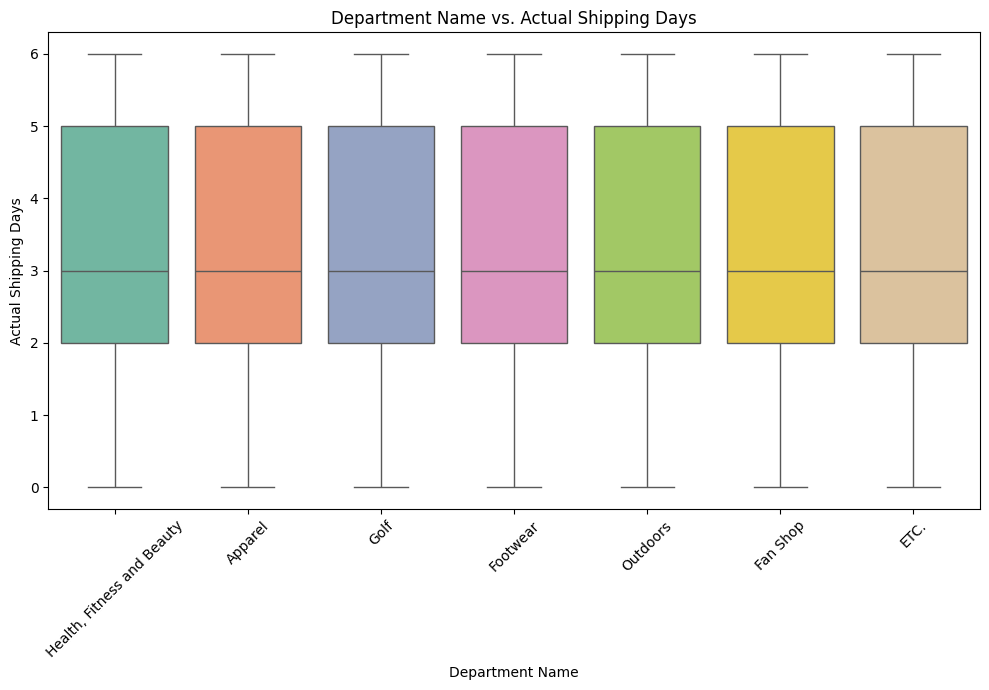

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Department Name', y='Days for shipping (real)', data=df_cleaned, palette="Set2")
plt.title('Department Name vs. Actual Shipping Days')
plt.ylabel('Actual Shipping Days')
plt.xlabel('Department Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> Department Name represents a high level of Category Name, so Category Name and Department Name both have no association with Actual Shipping days

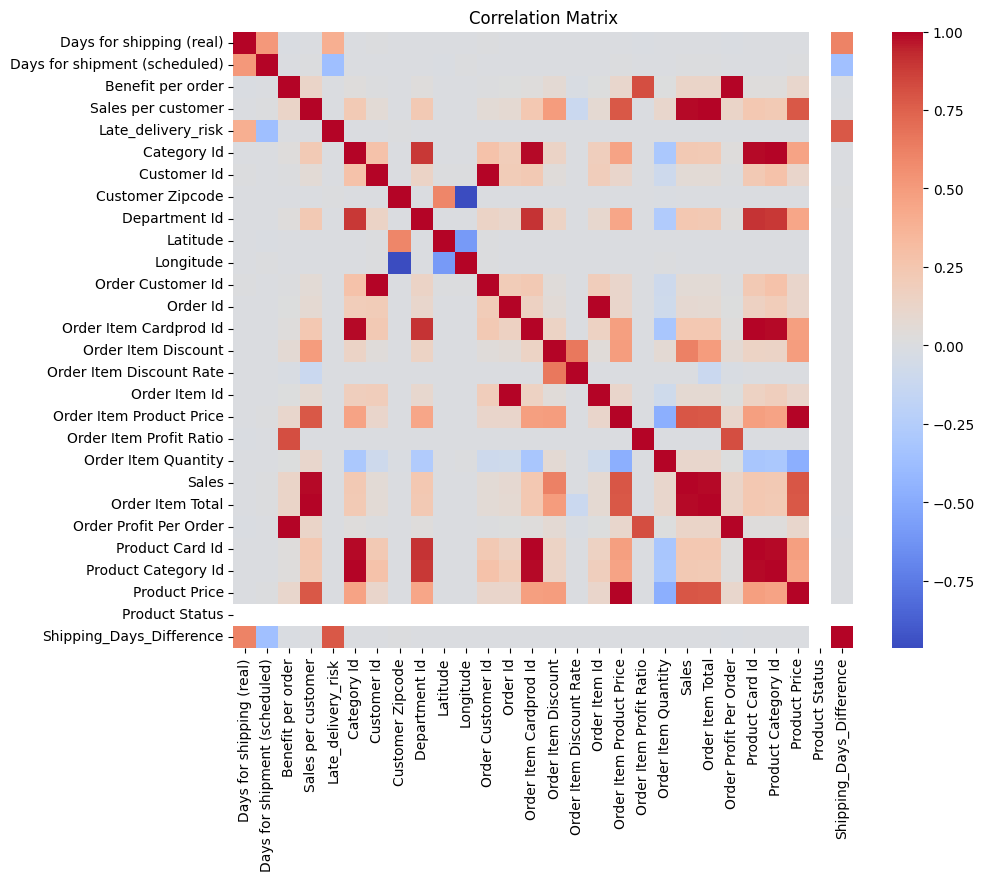

In [ ]:
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

>

*   There is a strong positive correlation between Days for shipping (real) and Shipping_Days_Difference. This suggests that as the actual shipping days increase, the difference from the scheduled shipping days also tends to increase.
*   Days for shipping (real) and Days for shipment (scheduled) have a positive correlation, which might indicate that when the scheduled shipping days increase, the actual shipping days tend to increase as well, although not as strongly as with the Shipping_Days_Difference.

*   Sales_per_customer has some degree of positive correlation with variables like Order Item Total, Order Profit Per Order, and Sales. This makes sense as higher sales would generally correlate with higher sales per customer and higher order totals.

*   There are several variables that have a strong negative correlation with Late_delivery_risk, which may suggest that these factors decrease the risk of late delivery. It might be useful to investigate these variables further to understand what decreases the risk of late delivery.

In [ ]:
selected_columns =df_cleaned[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk', 'Latitude', 'Longitude', 'order date (DateOrders)', 'Order Item Quantity', 'Order Item Total', 'shipping date (DateOrders)'  ]]

<ipython-input-41-6f3cf8872b0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y='Days for shipping (real)', data=data, palette="Set2")


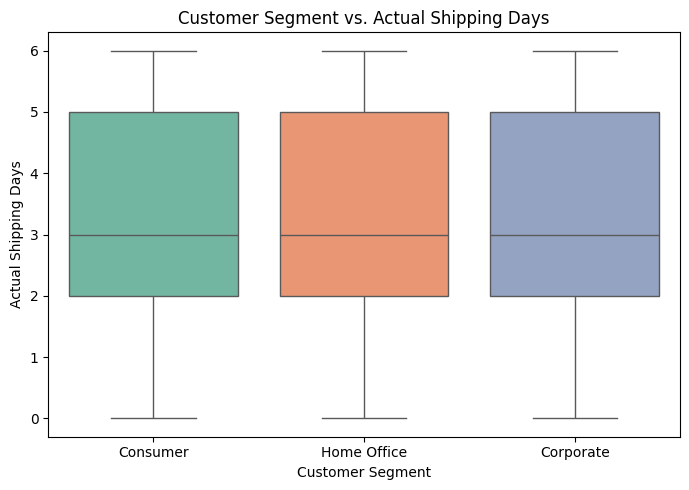

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Customer Segment', y='Days for shipping (real)', data=data, palette="Set2")
plt.title('Customer Segment vs. Actual Shipping Days')
plt.ylabel('Actual Shipping Days')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

> There are no significant association between actual shipping days and customer segments

In [ ]:
# Converting categorical data that represent date and time to datetime datatype.
df_cleaned['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
df_cleaned['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

In [ ]:
# Handling Time and date variables
df_cleaned['order_year'] = pd.DatetimeIndex(df_cleaned['order_date']).year
df_cleaned['order_month'] = pd.DatetimeIndex(df_cleaned['order_date']).month
df_cleaned['order_day'] = pd.DatetimeIndex(df_cleaned['order_date']).day
df_cleaned['shipping_year'] = pd.DatetimeIndex(df_cleaned['shipping_date']).year
df_cleaned['shipping_month'] = pd.DatetimeIndex(df_cleaned['shipping_date']).month
df_cleaned['shipping_day'] = pd.DatetimeIndex(df_cleaned['shipping_date']).day

In [ ]:
#Making new dataset only with only shipment related data

new_dataset_columns = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk',
                        'Latitude','Longitude','Shipping Mode','Order Status','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year', 'Department Name', 'Customer Segment']
len(new_dataset_columns)

18

In [ ]:
new_data = df_cleaned[new_dataset_columns]
model_data = new_data
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Latitude,Longitude,Shipping Mode,Order Status,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year,Department Name,Customer Segment
0,DEBIT,3,4,0,18.251453,-66.037056,Standard Class,COMPLETE,Pacific Asia,Advance shipping,31,1,2018,3,2,2018,"Health, Fitness and Beauty",Consumer
1,TRANSFER,5,4,1,18.279451,-66.037064,Standard Class,PENDING,Pacific Asia,Late delivery,13,1,2018,18,1,2018,"Health, Fitness and Beauty",Consumer
2,CASH,4,4,0,37.292233,-121.881279,Standard Class,CLOSED,Pacific Asia,Shipping on time,13,1,2018,17,1,2018,"Health, Fitness and Beauty",Consumer
3,DEBIT,3,4,0,34.125946,-118.291016,Standard Class,COMPLETE,Pacific Asia,Advance shipping,13,1,2018,16,1,2018,"Health, Fitness and Beauty",Home Office
4,PAYMENT,2,4,0,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Pacific Asia,Advance shipping,13,1,2018,15,1,2018,"Health, Fitness and Beauty",Corporate


In [ ]:
model_data['Department Name'].unique()

array(['Health, Fitness and Beauty', 'Apparel', 'Golf', 'Footwear',
       'Outdoors', 'Fan Shop', 'ETC.'], dtype=object)

In [ ]:
department_names = ['Health, Fitness and Beauty', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'ETC.' ]

# Create a mapping from category name to a unique number
category_mapping = {department: index for index, department in enumerate(department_names)}

# Replace the categories in your DataFrame with their numeric values
model_data['Department Name'] = model_data['Department Name'].replace(category_mapping)

<ipython-input-47-87488f96eb3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Department Name'] = model_data['Department Name'].replace(category_mapping)


In [ ]:
status_mapping = {
    'Advance shipping': 0,
    'Late delivery': 1,
    'Shipping on time': 2,
    'Shipping canceled': 3
}
model_data['Delivery Status'] = model_data['Delivery Status'].replace(status_mapping)


<ipython-input-48-ff5a6872b097>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Delivery Status'] = model_data['Delivery Status'].replace(status_mapping)


In [ ]:
model_data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [ ]:
status_mapping = {
   'CASH': 0,
    'TRANSFER': 1,
    'DEBIT': 2,
    'PAYMENT': 3
}

model_data['Type'] = model_data['Type'].replace(status_mapping)

<ipython-input-50-3f7d562cf2bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Type'] = model_data['Type'].replace(status_mapping)


In [ ]:
model_data['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [ ]:
status_mapping = {
   'Standard Class': 0,
    'First Class': 1,
    'Second Class': 2,
    'Same Day': 3
}

model_data['Shipping Mode'] = model_data['Shipping Mode'].replace(status_mapping)

<ipython-input-52-caa657902630>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Shipping Mode'] = model_data['Shipping Mode'].replace(status_mapping)


In [ ]:
model_data['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [ ]:
order_status_names = ['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW']

# Create a mapping from category name to a unique number
category_mapping = {order: index for index, order in enumerate(order_status_names)}

# Replace the categories in your DataFrame with their numeric values
model_data['Order Status'] = model_data['Order Status'].replace(category_mapping)

<ipython-input-54-f304ccf3e973>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Order Status'] = model_data['Order Status'].replace(category_mapping)


In [ ]:
model_data['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [ ]:
status_mapping = {
   'Pacific Asia': 0,
    'USCA': 1,
    'Africa': 2,
    'Europe': 3,
    'LATAM': 4
}

model_data['Market'] = model_data['Market'].replace(status_mapping)

<ipython-input-56-d39c7d11d094>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Market'] = model_data['Market'].replace(status_mapping)


In [ ]:
model_data['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [ ]:
status_mapping = {
   'Consumer': 0,
    'Home Office': 1,
    'Corporate': 2,
}

model_data['Customer Segment'] = model_data['Customer Segment'].replace(status_mapping)

<ipython-input-58-e6061fffc56f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Customer Segment'] = model_data['Customer Segment'].replace(status_mapping)


## 4 Modeling

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score, r2_score,mean_absolute_error,  r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import xgboost as xgb

In [ ]:
new_dataset_columns = pd.DataFrame(new_dataset_columns)

In [ ]:
# Selecting numeric features and calculating the correlation with 'Late_delivery_risk'

correlation = numerical_df.corr()['Late_delivery_risk'].sort_values(ascending=False)

# Remove the correlation of 'Late_delivery_risk' with itself
correlation = correlation[correlation.index != 'Late_delivery_risk']

print(correlation)

Shipping_Days_Difference         0.777663
Days for shipping (real)         0.401311
Customer Zipcode                 0.003577
Category Id                      0.001509
Product Category Id              0.001509
Order Customer Id                0.001415
Customer Id                      0.001415
Order Item Cardprod Id           0.001230
Product Card Id                  0.001230
Department Id                    0.000850
Order Item Discount Rate         0.000708
Latitude                         0.000384
Order Item Quantity             -0.000075
Order Item Discount             -0.000756
Order Id                        -0.001558
Order Item Id                   -0.001646
Order Item Product Price        -0.002600
Product Price                   -0.002600
Order Item Profit Ratio         -0.002641
Longitude                       -0.003285
Sales                           -0.003936
Benefit per order               -0.004096
Order Profit Per Order          -0.004096
Order Item Total                -0

In [ ]:
all_data = df_cleaned
df_cleaned.dropna(inplace=True)

In [ ]:
x = model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = model_data[['Days for shipping (real)']]

In [ ]:
#categorical_cols = x2.select_dtypes(include=['object', 'category']).columns
#numerical_cols = y2.select_dtypes(include=[np.number]).columns

In [ ]:
df_cleaned['Late_delivery_risk']

,Late_delivery_risk
0,0
1,1
2,0
3,0
4,0
...,...
179100,0
179101,1
179102,1
179103,0


In [ ]:
x2 = df_cleaned.select_dtypes(include=[np.number]).drop(columns=['Late_delivery_risk'])
y2 = df_cleaned['Late_delivery_risk']

In [ ]:
# Splitting the dataset into training and testing sets for feature selection
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(x2_train_scaled, y2_train)

# Best alpha value found
print(f'Optimal alpha value: {lasso_cv.alpha_}')

# Refit Lasso with the best alpha
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(x2_train_scaled, y2_train)

# Predicting and evaluating
y2_pred = lasso.predict(x2_test_scaled)
mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error: {mse}')

# Identifying important features
print("Coefficients:", lasso.coef_)
important_features = x2.columns[lasso.coef_ != 0]
print("Important features:", important_features)

Optimal alpha value: 0.0009593375890912688
Mean Squared Error: 0.09619659542538099
Coefficients: [ 0.00000000e+00 -5.00523581e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.07372583e-04
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.68321080e-01  0.00000000e+00
  0.00000000e+00  1.17125731e-03  0.00000000e+00  3.33809714e-05
  9.06709600e-04]
Important features: Index(['Days for shipment (scheduled)', 'Department Id',
       'Shipping_Days_Difference', 'order_day', 'shipping_month',
       'shipping_day'],
      dtype='object')


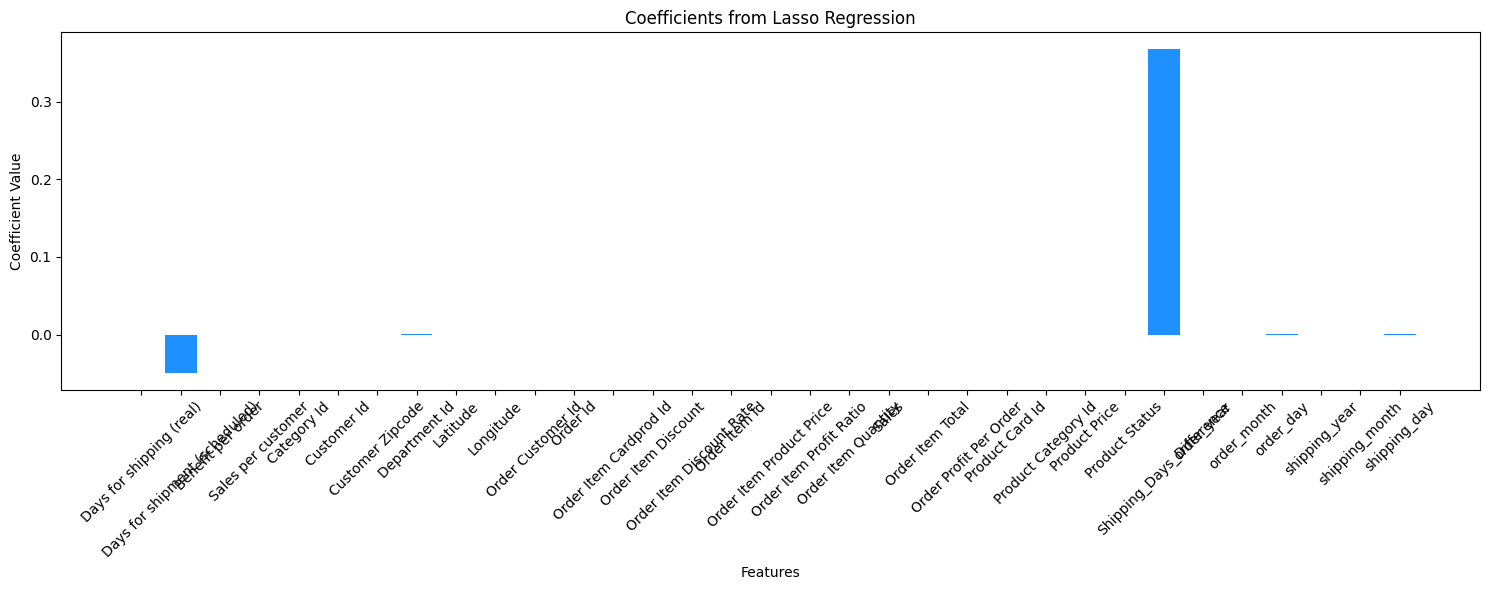

In [ ]:
coefficients = lasso.coef_
features = x2.columns

plt.figure(figsize=(15, 6))
plt.bar(x2.columns, coefficients, color='dodgerblue')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients from Lasso Regression')
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()

In [ ]:
coefficients = np.array([-0.00000004, 0.47326538, 0.00000014, 3.63218000e-01, 1.17152713e-03, 3.38309714e-05])
feature_names = np.array(['Department Id', 'Shipping Days Difference', 'order_day', 'shipping_month', 'shipping_day', 'Days for shipment (scheduled)'])

# Extracting non-zero coefficients and corresponding feature names
non_zero_indices = np.where(coefficients != 0)[0]
non_zero_coefficients = coefficients[non_zero_indices]
non_zero_feature_names = feature_names[non_zero_indices]

# Print non-zero coefficients and their feature names
for feature, coef in zip(non_zero_feature_names, non_zero_coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: Department Id, Coefficient: -4e-08
Feature: Shipping Days Difference, Coefficient: 0.47326538
Feature: order_day, Coefficient: 1.4e-07
Feature: shipping_month, Coefficient: 0.363218
Feature: shipping_day, Coefficient: 0.00117152713
Feature: Days for shipment (scheduled), Coefficient: 3.38309714e-05


In [ ]:
feature_names = x2.columns.to_numpy()

non_zero_mask = lasso.coef_ != 0
non_zero_coefficients = lasso.coef_[non_zero_mask]
non_zero_feature_names = feature_names[non_zero_mask]

# Use the absolute value of the coefficients and take log
log_coefficients = np.log(np.abs(non_zero_coefficients))

print(non_zero_coefficients)
print(log_coefficients)

[-5.00523581e-02  4.07372583e-04  3.68321080e-01  1.17125731e-03
  3.33809714e-05  9.06709600e-04]
[ -2.99468566  -7.80578235  -0.99880022  -6.74967748 -10.30752454
  -7.00568834]


Text(0.5, 1.0, 'LASSO regression features by importance')

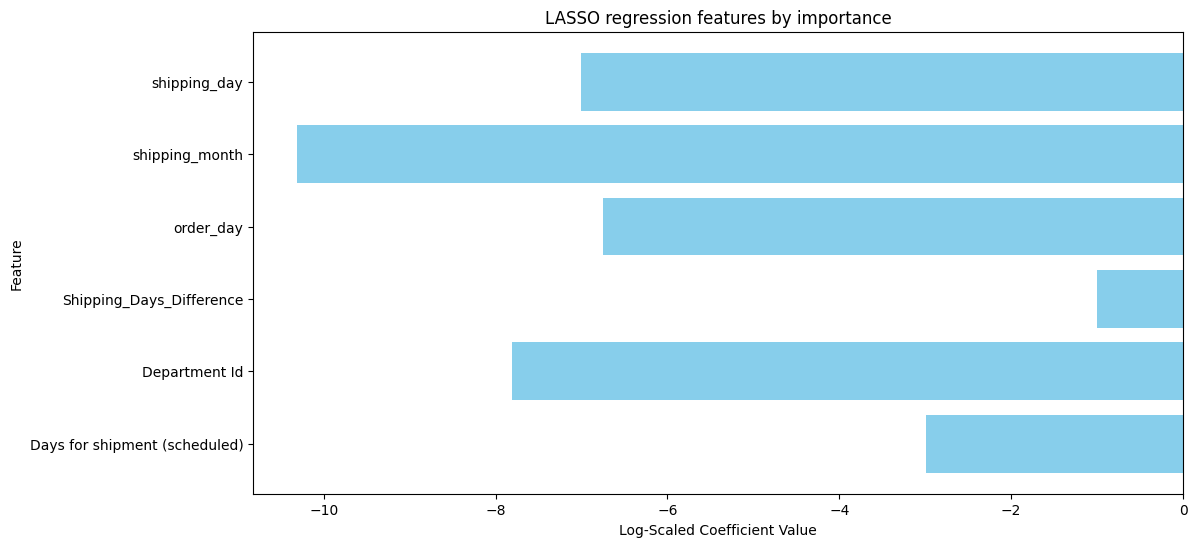

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.barh(non_zero_feature_names, log_coefficients, color='skyblue')

plt.xlabel('Log-Scaled Coefficient Value')
plt.ylabel('Feature')
plt.title('LASSO regression features by importance')

> + Shipping-related variables (shipping_month, shipping_day) are the most important predictors.
+ Department Id has a relatively strong negative effect, implying differences between departments could be a significant factor.
+ Days for shipment (scheduled) is considered less important compared to actual shipping dates and order details.

In [ ]:
#Define x2 as x2_columns based on the important features
x2_columns = df_cleaned[['Days for shipment (scheduled)', 'Department Id', 'order_day', 'shipping_month', 'shipping_day']]
df_cleaned.columns
x2_columns.columns

Index(['Days for shipment (scheduled)', 'Department Id', 'order_day',
       'shipping_month', 'shipping_day'],
      dtype='object')

In [ ]:
x.shape,y.shape

((179105, 16), (179105, 1))

In [ ]:
x.columns

Index(['Type', 'Late_delivery_risk', 'Latitude', 'Longitude', 'Shipping Mode',
       'Order Status', 'Market', 'Delivery Status', 'order_day', 'order_month',
       'order_year', 'shipping_day', 'shipping_month', 'shipping_year',
       'Department Name', 'Customer Segment'],
      dtype='object')

In [ ]:
y.columns

Index(['Days for shipping (real)'], dtype='object')

In [ ]:
x2.shape, y2.shape

((179102, 33), (179102,))

In [ ]:
x2.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Category Id', 'Customer Id',
       'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Card Id', 'Product Category Id',
       'Product Price', 'Product Status', 'Shipping_Days_Difference',
       'order_year', 'order_month', 'order_day', 'shipping_year',
       'shipping_month', 'shipping_day'],
      dtype='object')

In [ ]:
x2_columns.shape, y2.shape

((179102, 5), (179102,))

In [ ]:
x2_columns.columns

Index(['Days for shipment (scheduled)', 'Department Id', 'order_day',
       'shipping_month', 'shipping_day'],
      dtype='object')

In [ ]:
#y2 = df_cleaned['Late_delivery_risk'].values.reshape(-1, 1)  # Convert to 2D array
#print(y2.shape)

In [ ]:
# train-test_split
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20, random_state=42)
x2_columns_train, x2_columns_test, y2_train, y2_test = train_test_split(x2_columns, y2, test_size=0.2, random_state=42)

> **x and y** are for predicting days for shipping<br>
**x2_columns and y2** are to predict the likelihood of the late delivery risk

### 4.1 Outcome: Days for shipping (Numerical)

#### 4.1.1 Support Vector Machine Regression

In [ ]:
# Scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Create the SVR model
svr = SVR(kernel='linear')

# Fit the model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test data
y_pred_svr = svr.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



#### 4.1.2 XGBoost Regression

In [ ]:
# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(x_test)


#### 4.1.3 Neural Network

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(x_train, y_train, epochs=10)

# Make predictions on the test data
y_pred_nn = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 1.1895
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3901
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.3853
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3795
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3775
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3761
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3781
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3745
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3720
Epoch 10/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3753
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


###4.2 Outcome: Late delivery risk (Binary)

In [ ]:
y = y2
x_train = x2_columns_train
x_test = x2_columns_test
y_train = y2_train
y_test = y2_test

#### 4.2.1 Decesion Tree

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)
y_pred_dt = pred

#### 4.2.2 Logistic Regression

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with the training data
logreg.fit(x_train, y_train)

# Predict the labels of the test set
y_prob_lr = logreg.predict_proba(x_test)[:,1]

threshold = 0.5
y_pred_lr = (y_prob_lr >= threshold).astype(int)

#### 4.2.3 Random Forest

In [ ]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(x_test)

y_prob_rf = rf_clf.predict_proba(x_test)[:,1]

## 5 Evaluation

### 5.1 Outcome: Days of shipping (Numerical)

#### 5.1.1 Support Vector Machine Regression

In [ ]:
# Evaluate the model
rmse_svr = mean_squared_error(y_test, y_pred_svr)
print('RMSE:', rmse_svr)

RMSE: 10.590979609396244


#### 5.1.2 XGBoost Regression

In [ ]:
# Evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('RMSE:', rmse_xgb)

RMSE: 11.216567484711076


####5.1.3 Neural Network

In [ ]:
# Evaluate the model
rmse_nn = mean_squared_error(y_test, y_pred_nn)
print('RMSE:', rmse_nn)

RMSE: 11.062382062863799


###5.2 Binary

#### 5.2.1 Decesion Tree

In [ ]:
#Function for estimating r2_score, mean_squared_error, mean_absolute_error
def metrics(y_test,pred):
    a = r2_score(y_test,y_pred_dt)
    b = mean_squared_error(y_test,y_pred_dt)
    c = mean_absolute_error(y_test,y_pred_dt)
    print('r-squared score: ',a)
    print('The mean squared error:',b)
    print('The mean accuracy score:',c)

threshold = 0.5
y_pred_dt_class = (y_pred_dt >= threshold).astype(int)

acc_dt = accuracy_score(y_test, y_pred_dt_class)
precision_dt= precision_score(y_test, y_pred_dt_class)
recall_dt= recall_score(y_test, y_pred_dt_class)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_class))

# Print the classification report for precision, recall, f1-score and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_class))

metrics(y_test,pred)

print(f"AUC: {roc_auc_score(y_test, y_pred_dt)} ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_class)}")
print(f"Precision: {precision_score(y_test, y_pred_dt_class)}")
print(f"Recall: {recall_score(y_test, y_pred_dt_class)} ")

Confusion Matrix:
[[10295  5826]
 [ 6899 12801]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62     16121
           1       0.69      0.65      0.67     19700

    accuracy                           0.64     35821
   macro avg       0.64      0.64      0.64     35821
weighted avg       0.65      0.64      0.65     35821

r-squared score:  0.009439129877086061
The mean squared error: 0.24516809972767076
The mean accuracy score: 0.39035898491442206
AUC: 0.6827237276346362 
Accuracy: 0.644761452779096
Precision: 0.6872282171042036
Recall: 0.6497969543147208 


####5.2.2 Logistic Regression

In [ ]:
# Model Evaluation
# Print the accuracy score
print(f"AUC: {roc_auc_score(y_test, y_pred_lr)} ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)} ")


acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr= precision_score(y_test, y_pred_lr)
recall_lr= recall_score(y_test, y_pred_lr)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Print the classification report for precision, recall, f1-score and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

AUC: 0.7026415886583599 
Accuracy: 0.6913263169649089
Precision: 0.7964195075108033
Recall: 0.5893908629441624 
Confusion Matrix:
[[13153  2968]
 [ 8089 11611]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.70     16121
           1       0.80      0.59      0.68     19700

    accuracy                           0.69     35821
   macro avg       0.71      0.70      0.69     35821
weighted avg       0.72      0.69      0.69     35821



####5.2.3 Random Forest

In [ ]:
print(f"AUC: {roc_auc_score(y_test, y_pred_rf)} ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)} ")


acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf= precision_score(y_test, y_pred_rf)
recall_rf= recall_score(y_test, y_pred_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Print the classification report for precision, recall, f1-score and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

AUC: 0.6575735861128893 
Accuracy: 0.6542810083470589
Precision: 0.7115184457037123
Recall: 0.6246192893401015 
Confusion Matrix:
[[11132  4989]
 [ 7395 12305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64     16121
           1       0.71      0.62      0.67     19700

    accuracy                           0.65     35821
   macro avg       0.66      0.66      0.65     35821
weighted avg       0.66      0.65      0.66     35821



## 6 Executive Summary

In [ ]:
from sklearn.metrics import roc_curve, auc

#### 6.1 Days of Shipping (Nemerical)

#####6.1.1 RMSE

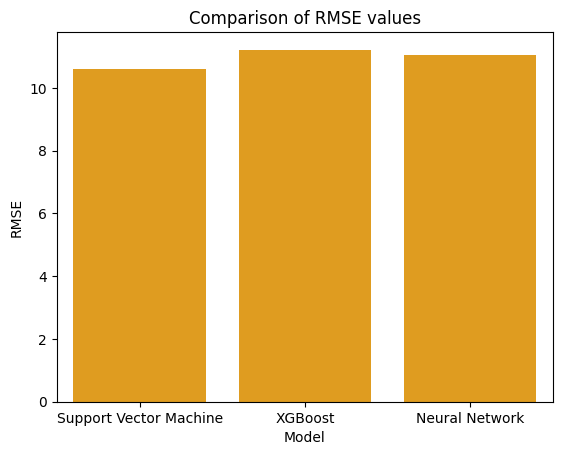

In [ ]:
data = {'Model': ['Support Vector Machine', 'XGBoost', 'Neural Network'],
       'RMSE': [rmse_svr, rmse_xgb, rmse_nn]}

df = pd.DataFrame(data)

sns.barplot(x='Model', y='RMSE', data=df, color='orange')
plt.title('Comparison of RMSE values')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()


In [ ]:
report = pd.DataFrame({
    'Model' : ['Support Vector Machine Regression', 'XGBoost Regression', 'Neural Network'],
    'RMSE' : [rmse_svr, rmse_xgb, rmse_nn]})
print(report)

                               Model       RMSE
0  Support Vector Machine Regression  10.590980
1                 XGBoost Regression  11.216567
2                     Neural Network  11.062382


**Support Vector Machine**
+ This model has an RMSE of approximately 10.59. This is the lowest value among the three models, indicating that, on average, the Support Vector Machine's predictions deviate from the actual values by about 10.59 units.

**XGBoost**
+ The XGBoost model has an RMSE of approximately 11.22. This is slightly higher than the Support Vector Machine model, suggesting its predictions are on average about 11.22 units away from the actual values.

**Neural Network**
+ This model has an RMSE of approximately 11.57. This value is closer to that of the XGBoost model and indicates that the Neural Network's predictions deviate from the actual values by about 11.57 units on average.

**Overall Insights**
+ Based on the RMSE values alone, the **Support Vector Machine Regression model** (10.59) would be the best choice among the three for predicting outcomes, as it has the lowest RMSE.




####6.2 Late delivery risk (Binary)

#####6.2.1 ROC Curve AUC Scores

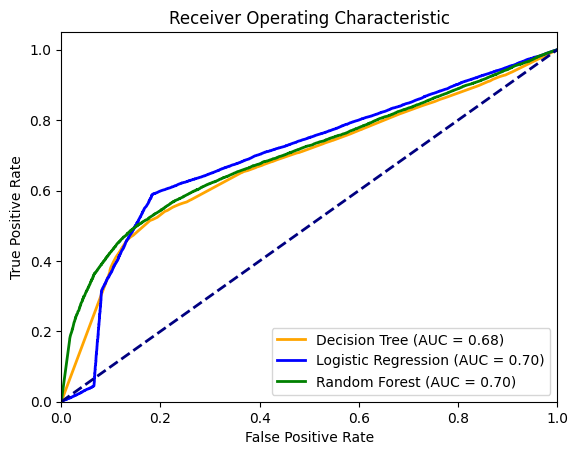

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred_dt)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_prob_lr)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_prob_rf)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
lw = 2  # Line width
plt.plot(fpr1, tpr1, color='orange', lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='Green', lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc3)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # Diagonal 50% line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**ROC Curve AUC Scores**
+ Decision Tree: 0.68

This model has an AUC score of 0.68, which suggests it has a fair ability to distinguish between the positive and negative classes. An AUC score closer to 0.5 would suggest no discriminative ability (equivalent to random guessing), while a score closer to 1 indicates excellent model performance. Therefore, a score of 0.68 indicates that the decision tree model is better than random guessing but not highly accurate.

+ Logistic Regression: 0.70

The logistic regression model has a slightly higher AUC score of 0.70. This means that the logistic regression model is generally better at distinguishing between the positive and negative classes than the decision tree model is. The logistic regression model is doing slightly better than the decision tree model.

+ Random Forest: 0.70

The random forest model also has an AUC score of 0.70, which is the same as logistic regression in this case. It suggests that the random forest has a similar ability to discriminate between the classes as the logistic regression model does for the given dataset.

##### 6.2.2 Accuray, Recall, Precision

In [ ]:
report = pd.DataFrame({
    'Model' : ['Decision Tree', 'Logistic Regression', 'Random Forest'
              ''],
    'Accuracy' : [acc_dt, acc_lr, acc_rf],
    'Recall' : [recall_dt, recall_lr,recall_rf],
    'Precision' : [precision_dt, precision_lr, precision_rf]  })

report.sort_values(by = 'Accuracy', ascending = False).reset_index().drop(columns=['index'])

,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.691326,0.589391,0.796420
1,Random Forest,0.654281,0.624619,0.711518
2,Decision Tree,0.644761,0.649797,0.687228


**Accuracy**
+ The Logistic Regression model has the highest accuracy at approximately 69.13%, meaning it makes the correct prediction about 69 out of 100 times across all classes, which is the best among the three models.
The Random Forest and Decision Tree models have lower accuracy, indicating that they make more incorrect predictions overall compared to the Logistic Regression model.

**Precision**
+ The Logistic Regression model leads in precision with approximately 79.64%, meaning that when it predicts an instance is positive, it is correct about 80 out of 100 times.
The Random Forest and Decision Tree models have lower precision, suggesting that when they predict positive instances, they are less likely to be correct compared to the Logistic Regression model.

**Recall**
+ The Decision Tree model has the highest recall at approximately 64.96%, meaning it is the best at capturing true positives but at the cost of also capturing more false positives.
The Random Forest model, while having lower accuracy than the Logistic Regression, has a better recall, suggesting it might be more suitable in situations where missing a positive instance is more detrimental than making false positive errors.
The Logistic Regression model, despite being the most accurate overall, has the lowest recall, meaning it might miss more true positive instances compared to the other models.

**Overall Insights**
+ Considering Accuracy, Precision, Recall and AUC scores, the **Logistic Regression model** (Accuracy: 69.13%, Precision: 79.64%, Recall: 58.93% , ACU scores: 0.70) offers the best balance between all metrics, with the highest accuracy and precision and a competitive AUC score. Thus, the Logistic Regression model is the best overall model among the three.

In [ ]:
coefficients = logreg.coef_[0]
feature_names = x_train.columns

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeff_df['Absolute Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

coeff_df  # In Colab or Jupyter, this will automatically display the DataFrame


,Feature,Coefficient,Absolute Coefficient
0,Days for shipment (scheduled),-0.616531,0.616531
1,Department Id,0.001692,0.001692
4,shipping_day,0.001199,0.001199
3,shipping_month,-0.000895,0.000895
2,order_day,0.000501,0.000501


**Final model for late delivery risk problem: Losgistic Regression model**

> + Feature Importance: "Days for shipment (scheduled)" is by far the most important predictor of late delivery risk, with a strong negative impact, meaning that the longer the shipment is scheduled in advance, the less likely it is to be late.
+ The other features (Department ID, shipping day, shipping month, and order day) have very small coefficients, indicating that they have a relatively minor impact on predicting late delivery.